# Voorspellen gebruik van gas

## 1. Importen packages en dataframe

### 1.1 Packages

In [103]:
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as pltmat

%matplotlib inline

### 1.2 Ophalen data van Raspberry PI

In [225]:
df = pd.read_csv('//raspberrypi/pi/domoticz/data/logging.csv')
df.columns = df.columns.str.lower()
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d-%m-%Y %H:%M:%S")
df['datum'] = pd.to_datetime(df['timestamp'].dt.date)

df = df[['timestamp', 'datum', 'dagverbruik_gas', 'kamertemperatuur', 'thermostaat', 'buitentemperatuur']]
df = df.rename(columns={'datum': 'date', 
                        'dagverbruik_gas': 'usage', 
                        'kamertemperatuur': 'temp_room', 
                        'thermostaat': 'temp_setting', 
                        'buitentemperatuur': 'temp_out'})

df.head(5)

,timestamp,date,usage,temp_room,temp_setting,temp_out
0,2019-02-14 21:34:00,2019-02-14,NaN,20.0,20.0,3.7
1,2019-02-14 21:35:00,2019-02-14,NaN,20.0,20.0,3.7
2,2019-02-14 21:36:00,2019-02-14,NaN,20.0,20.0,3.7
3,2019-02-14 21:37:00,2019-02-14,NaN,20.0,20.0,3.7
4,2019-02-14 21:38:00,2019-02-14,NaN,20.0,20.0,3.7


# 2 Eerste inzichten

### 2.1 Gasverbruik

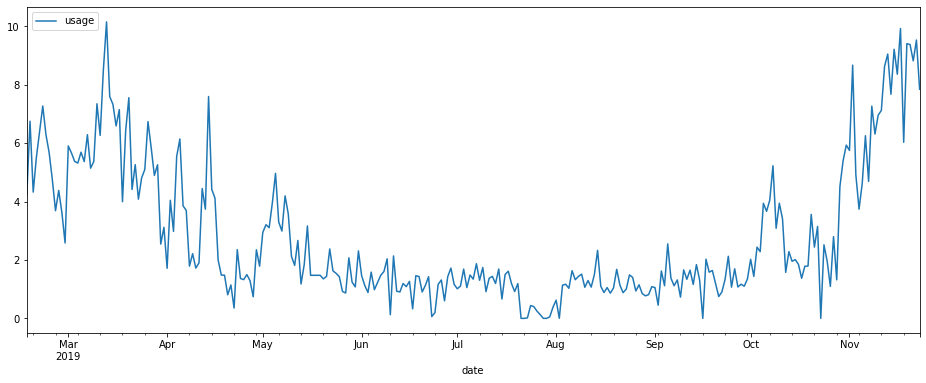

In [226]:
(
    df[['date', 'usage']]
    .dropna(subset=['usage'])
    .set_index('date')
    .plot(figsize=(16,6))
)

In [228]:
(
    df
    .assign(temp_room=lambda d: d['temp_room'].mean())
    .assign(temp_outside=lambda d: d['temp_out'].mean())
    .drop(['timestamp', 'temp_setting'], axis=1)
    .dropna(subset=['usage'])
    .head(10)
#    .set_index('datum')
#    .plot(figsize=(16,6))
)

,date,usage,temp_room,temp_out,temp_outside
1586,2019-02-16,4.237,21.277955,5.7,13.213544
3026,2019-02-17,6.753,21.277955,4.5,13.213544
4464,2019-02-18,4.326,21.277955,6.0,13.213544
5904,2019-02-19,5.517,21.277955,7.9,13.213544
7344,2019-02-20,6.390,21.277955,6.8,13.213544
8784,2019-02-21,7.274,21.277955,5.9,13.213544
10224,2019-02-22,6.293,21.277955,8.0,13.213544
11664,2019-02-23,5.678,21.277955,7.5,13.213544
13104,2019-02-24,4.752,21.277955,5.3,13.213544
14544,2019-02-25,3.688,21.277955,4.5,13.213544


## 2. Bepalen hoeveel gas er gemiddeld per dag wordt verbruikt in de maand juni en augustus

### 2.1 Dagverbruik juni

In [229]:
df_jun = (
    df[['date', 'usage']]
    .dropna(subset=['usage'])
    .loc[lambda d: d.date >= "2019-06-01"]
    .loc[lambda d: d.date <= "2019-06-30"]
    .mean()
)
df_jun

usage    1.146067
dtype: float64

### 2.2 Dagverbruik augustus

In [230]:
df_aug = (
    df[['date', 'usage']]
    .dropna(subset=['usage'])
    .loc[lambda d: d.date >= "2019-08-01"]
    .loc[lambda d: d.date <= "2019-08-31"]
    .mean()
)
df_aug

usage    1.13829
dtype: float64

In [146]:
def make_ts_df():
    dates = [str(_) for _ in pd.date_range("2018-01-01", "2019-01-01")]
    values = [np.nan if np.random.random() < 0.05 else _ for _ in np.random.normal(0, 1, 366)]
    return pd.DataFrame({"date": dates, "value": values})

date_df = make_ts_df()

date_df

,date,value
0,2018-01-01 00:00:00,-1.042599
1,2018-01-02 00:00:00,0.785216
2,2018-01-03 00:00:00,-0.009579
3,2018-01-04 00:00:00,-1.131027
4,2018-01-05 00:00:00,-2.479044
...,...,...
361,2018-12-28 00:00:00,-0.896905
362,2018-12-29 00:00:00,0.010470
363,2018-12-30 00:00:00,-0.242293
364,2018-12-31 00:00:00,NaN
